In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel("Nuclear_Power.xlsx",skiprows=2)
data.head()

,Year,US,Canada,France
0,1980,251.12,35.88,63.42
1,1981,272.67,37.80,99.24
2,1982,282.77,36.17,102.63
3,1983,293.68,46.22,135.99
4,1984,327.63,49.26,180.47


In [3]:
data.tail()

,Year,US,Canada,France
22,2002,780.06,71.75,414.92
23,2003,763.73,71.15,419.02
24,2004,788.53,85.87,425.83
25,2005,781.99,87.44,428.95
26,2006,787.22,93.07,427.68


In [4]:
data.describe()

,Year,US,Canada,France
count,27.000000,27.000000,27.000000,27.000000
mean,1993.000000,577.744444,71.217407,304.544444
std,7.937254,180.637056,17.776389,110.427836
min,1980.000000,251.120000,35.880000,63.420000
25%,1986.500000,434.655000,67.485000,244.415000
50%,1993.000000,618.780000,72.860000,341.980000
75%,1999.500000,741.070000,83.275000,385.935000
max,2006.000000,788.530000,102.440000,428.950000


In [5]:
data.shape

(27, 4)

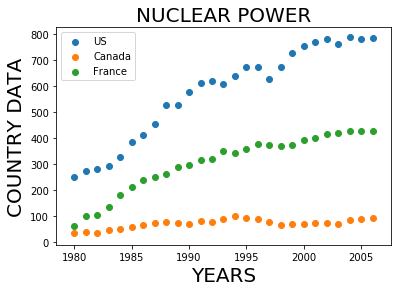

In [6]:
plt.xlabel("YEARS",fontsize=20)
plt.ylabel("COUNTRY DATA",fontsize=20)
plt.title("NUCLEAR POWER",fontsize=20)
plt.scatter(data.Year,data.US,label='US')
plt.scatter(data.Year,data.Canada,label='Canada')
plt.scatter(data.Year,data.France,label='France')
plt.legend()

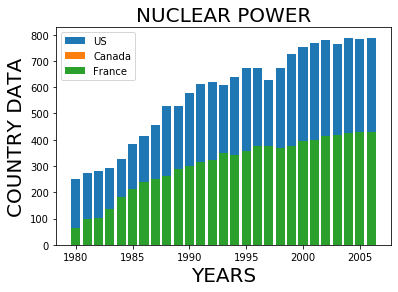

In [7]:
plt.xlabel("YEARS",fontsize=20)
plt.ylabel("COUNTRY DATA",fontsize=20)
plt.title("NUCLEAR POWER",fontsize=20)
plt.bar(data.Year,data.US,label='US')
plt.bar(data.Year,data.Canada,label='Canada')
plt.bar(data.Year,data.France,label='France')
plt.legend()

In [8]:
data.head()

,Year,US,Canada,France
0,1980,251.12,35.88,63.42
1,1981,272.67,37.80,99.24
2,1982,282.77,36.17,102.63
3,1983,293.68,46.22,135.99
4,1984,327.63,49.26,180.47


In [9]:
X=data.drop(['US','Canada','France'],axis=1)
X

,Year
0,1980
1,1981
2,1982
3,1983
4,1984
5,1985
6,1986
7,1987
8,1988
9,1989


In [10]:
y=data.drop(['Year'],axis=1)
y

,US,Canada,France
0,251.12,35.88,63.42
1,272.67,37.80,99.24
2,282.77,36.17,102.63
3,293.68,46.22,135.99
4,327.63,49.26,180.47
5,383.69,57.10,211.19
6,414.04,67.23,239.56
7,455.27,72.89,249.27
8,526.97,78.18,260.29
9,529.35,75.35,288.72


In [11]:
y.shape

(27, 3)

In [12]:
X.shape

(27, 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [16]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.predict(X_test)

array([[445.57389499,  61.97319495, 224.80847375],
       [401.51704518,  58.8917908 , 198.22981685],
       [687.88656899,  78.92091779, 370.99108669],
       [753.97184371,  83.54302401, 410.85907204],
       [533.68759463,  68.13600326, 277.96578755],
       [313.40334554,  52.7289825 , 145.07250305]])

In [18]:
X_test.shape

(6, 1)

In [19]:
model.predict([[2006]])

array([[864.11396825,  91.24653439, 477.30571429]])

In [20]:
model.predict([[2007]])

array([[886.14239316,  92.78723647, 490.59504274]])

In [21]:
model.predict([[2008]])

array([[908.17081807,  94.32793854, 503.88437118]])

In [22]:
model.predict([[2009]])

array([[930.19924298,  95.86864062, 517.17369963]])

In [23]:
model.coef_

array([[22.02842491],
       [ 1.54070208],
       [13.28932845]])

In [24]:
model.intercept_

array([-43324.90639805,  -2999.40182947, -26181.08715507])

In [25]:
model.score(X_test,y_test)

0.9426006467981093

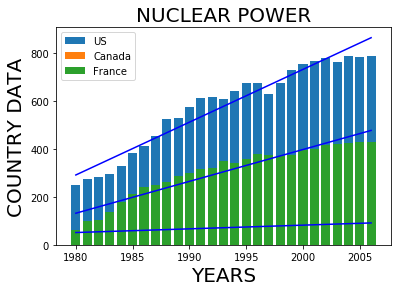

In [26]:
plt.xlabel("YEARS",fontsize=20)
plt.ylabel("COUNTRY DATA",fontsize=20)
plt.title("NUCLEAR POWER",fontsize=20)
plt.bar(data.Year,data.US,label='US')
plt.bar(data.Year,data.Canada,label='Canada')
plt.bar(data.Year,data.France,label='France')
plt.plot(data.Year,model.predict(data[['Year']]),color='blue')
plt.legend()

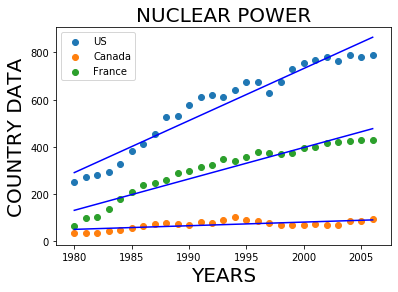

In [27]:
plt.xlabel("YEARS",fontsize=20)
plt.ylabel("COUNTRY DATA",fontsize=20)
plt.title("NUCLEAR POWER",fontsize=20)
plt.scatter(data.Year,data.US,label='US')
plt.scatter(data.Year,data.Canada,label='Canada')
plt.scatter(data.Year,data.France,label='France')
plt.plot(data.Year,model.predict(data[['Year']]),color='blue')
plt.legend()

In [28]:
import pickle

In [29]:
with open("Nuclear_model",'wb') as file:
    pickle.dump(model,file)

In [30]:
with open("Nuclear_model",'rb') as file:
    mp=pickle.load(file)

In [31]:
mp.predict([[2009]])

array([[930.19924298,  95.86864062, 517.17369963]])

In [32]:
import streamlit as slt